In [1]:
%matplotlib inline

import matplotlib as plt
import numpy as np
import pandas as pd

In [3]:
train_df = pd.read_csv("data/train.csv")
transactions_df = pd.read_csv("data/historical_transactions.csv")

In [4]:
train_df.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


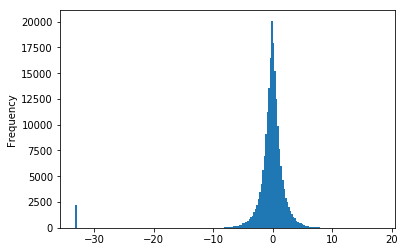

In [10]:
train_df["target"].plot.hist(bins=200)

In [7]:
transactions_df.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,3.640090e-02,2.194578e+00,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123522e+03,1.531896e+00,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.000000e+00,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01


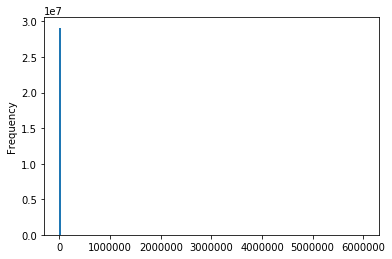

In [9]:
transactions_df["purchase_amount"].plot.hist(bins=200)

Para fazer a análise desses dados com os outliers do target vamos fazer uma remoção deles colocando eles em uma blacklist

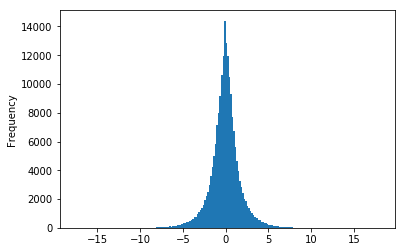

In [13]:
pure_train = train_df[train_df["target"] > -30]
pure_train["target"].plot.hist(bins=200)

Agora vamos utilizar o modelo dos outliers

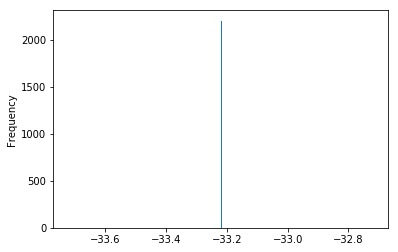

In [17]:
outliers_train = train_df[train_df["target"] <= -30]
outliers_train["target"].plot.hist(bins=200)

In [18]:
outliers_train.describe()

,feature_1,feature_2,feature_3,target
count,2207.000000,2207.000000,2207.000000,2.207000e+03
mean,3.224286,1.782510,0.591300,-3.321928e+01
std,1.207783,0.810069,0.491705,7.107038e-15
min,1.000000,1.000000,0.000000,-3.321928e+01
25%,2.000000,1.000000,0.000000,-3.321928e+01
50%,3.000000,2.000000,1.000000,-3.321928e+01
75%,4.000000,2.000000,1.000000,-3.321928e+01
max,5.000000,3.000000,1.000000,-3.321928e+01


In [21]:
percentage = outliers_train.count()/train_df.count()
percentage*100

first_active_month    1.093023
card_id               1.093023
feature_1             1.093023
feature_2             1.093023
feature_3             1.093023
target                1.093023
dtype: float64

Para fazer as predições o ideal é criar dois modelos, um para prever se o card_id é um outlier ou não. Para isso podemos tentar fazer uso de um modelo simples de regressão logística. Porém, para realizar essas atividades seria um esforço grande para um pequeno resultado, uma vez que o outliers são estritamente 1.1% dos dados do dataset

In [45]:
df_tuples = outliers_train[["feature_1", "feature_2", "feature_3"]].apply(tuple, axis=1)
df_dummies = pd.get_dummies(df_tuples)
df_dummies.columns = list(range(len(df_dummies.columns)))
s = pd.Series(df_dummies.columns[np.where(df_dummies != 0)[1]])
s.index = df_tuples.index
outliers_train["class"] = s
outliers_train.head()

/Users/caiogomes/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,first_active_month,card_id,feature_1,feature_2,feature_3,target,class
64,2017-09,C_ID_8186f3fcc1,3.0,1.0,1.0,-33.219281,6
92,2015-05,C_ID_b9379a30ea,3.0,3.0,1.0,-33.219281,8
125,2015-10,C_ID_e9120f535c,3.0,3.0,1.0,-33.219281,8
151,2017-03,C_ID_65715cb80d,4.0,2.0,0.0,-33.219281,10
225,2017-01,C_ID_ae77d244b6,2.0,1.0,0.0,-33.219281,3


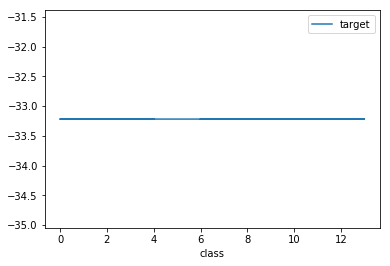

In [48]:
outliers_train.plot(x="class", y="target")

Como nenhum resultado foi conclusivo, vamos ignorar momentaneamente essas análises e seguir em frente para realizar a predição dos tipos de dados presentes no dataset de treinamento. Porém, podemos utilizar a técnica que aprendemos dessa análise momentanea do conjunto de dados de outliers para que possamos fazer uso dessas técnicas em relação a fazer o 1 hot encoding para cada tupla de features e assim podemos fazer um plot do estudo estatístico para cada uma dessas categorias de features e utilizar elas como base para realizar as nossas predições e posteriormente juntar com os dados de transações.

In [ ]:
def seq